In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
#%matplotlib inline

#sns.set(color_codes = True)
df = pd.read_csv('propertydataoriginal.csv')
df.shape

(25308, 36)

In [2]:
to_drop = [ 'user_id',       
            'user_personal_language',                             
            'user_loginStatus',     
            'classified_transactionType',
            'classified_atticExists',
            'classified_basementExists',
            'classified_outdoor_garden_surface',
            'classified_specificities_SME_office_exists',
            'classified_wellnessEquipment_hasSwimmingPool',
            'customer_groupInfo_name',                     
            'customer_networkInfo_id',
            'customer_networkInfo_name',                           
            'screen_name',                          
            'screen_language',
            'classified_subtype',
            'customer_name',
            'customer_family',
            'classified_visualisationOption',
            'classified_condition_isNewlyBuilt',
            'customer_groupInfo_id',
           'classified_parking_parkingSpaceCount_indoor',
           'classified_parking_parkingSpaceCount_outdoor'

          ]
df.drop(to_drop, inplace=True, axis=1)

df.shape


(25308, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Unnamed: 0                                             25308 non-null  int64  
 1   classified_id                                          25279 non-null  float64
 2   classified_type                                        25279 non-null  object 
 3   classified_price                                       25279 non-null  object 
 4   classified_zip                                         25279 non-null  float64
 5   classified_kitchen_type                                17303 non-null  object 
 6   classified_building_constructionYear                   15009 non-null  float64
 7   classified_building_condition                          18985 non-null  object 
 8   classified_energy_heatingType                 

In [4]:
df['classified_id'].is_unique

False

In [5]:
df.isna().any().sum()

13

In [6]:
df.fillna(value = 0,
       inplace = True)
df.classified_price = df.classified_price.fillna('None')


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25303    False
25304    False
25305    False
25306    False
25307    False
Length: 25308, dtype: bool

In [8]:
df['classified_price'].dtypes
df.classified_price

0               339000
1               395000
2               965000
3               249000
4               325000
             ...      
25303           495000
25304    280000-635000
25305           208000
25306           149000
25307          1390000
Name: classified_price, Length: 25308, dtype: object

In [9]:
print(df[df['classified_price'].isnull()])
df['classified_price'] = pd.to_numeric(df['classified_price'], errors='coerce')
#And for remove all rows with NaNs in column x use dropna:

df = df.dropna(subset=['classified_price'])
#Last convert values to ints:

df['classified_price'] = df['classified_price'].astype(int)

Empty DataFrame
Columns: [Unnamed: 0, classified_id, classified_type, classified_price, classified_zip, classified_kitchen_type, classified_building_constructionYear, classified_building_condition, classified_energy_heatingType, classified_certificates_primaryEnergyConsumptionLevel, classified_bedroom_count, classified_land_surface, classified_outdoor_terrace_exists, customer_id]
Index: []


In [10]:
df = df[df['classified_price'] !=0]
df = df.loc[df['classified_price']< 800000]
df.head()

,Unnamed: 0,classified_id,classified_type,classified_price,classified_zip,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_land_surface,classified_outdoor_terrace_exists,customer_id
0,0,10146915.0,apartment,339000,9890.0,hyperequipped,2021.0,asnew,gas,1.0,2.0,0.0,True,1989885.0
1,1,10156372.0,apartment,395000,1140.0,usahyperequipped,2022.0,asnew,gas,54.0,3.0,0.0,True,3845981.0
3,3,10157770.0,apartment,249000,1800.0,installed,2010.0,good,gas,88.0,2.0,0.0,True,1483.0
4,4,10157545.0,apartment,325000,8380.0,hyperequipped,1967.0,asnew,gas,99.0,2.0,0.0,True,285802.0
5,5,10157660.0,apartment,369000,9000.0,usahyperequipped,2007.0,good,gas,127.0,2.0,0.0,True,1989885.0


In [11]:
df= df[df['classified_building_condition'] != 0]

In [12]:
df = df[df['classified_energy_heatingType'] != 0]

In [13]:
df.drop(df.loc[df['classified_energy_heatingType'] =='solar'].index, inplace=True)

In [14]:
df.drop(df.loc[df['classified_energy_heatingType'] =='wood'].index, inplace=True)

In [15]:
df.drop(df.loc[df['classified_energy_heatingType'] =='carbon'].index, inplace=True)

In [16]:
df.drop(df.loc[df['classified_energy_heatingType'] =='pellet'].index, inplace=True)

In [17]:
df.to_csv('property_data3.csv', index=False)

In [18]:
df.shape

(13150, 14)

In [19]:
df['classified_price'].describe()

count     13150.000000
mean     336210.204563
std      161439.903312
min       10000.000000
25%      220000.000000
50%      295000.000000
75%      429000.000000
max      799950.000000
Name: classified_price, dtype: float64

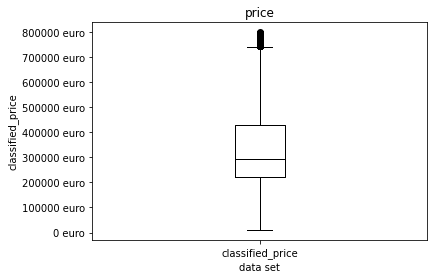

In [20]:
ax = df['classified_price'].plot(kind='box', title='price', color = 'black') #return an object from matplotlib
ax.set_ylabel('classified_price')
ax.set_xlabel('data set')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d euro'))
plt.savefig('price.jpg', bbox_inches='tight')


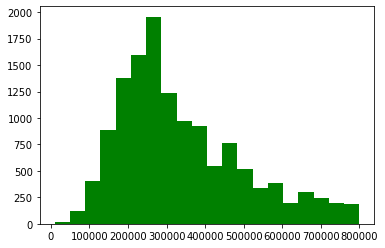

In [21]:
# check the distribution of the price

plt.hist(df['classified_price'], bins=(20),color = 'green');
ax.set_title("Average price")
  
# adding labels
#ax.set_xlabel('price')
#ax.set_ylabel('data')
#plt.gca().xaxis.set_major_formatter(FormatStrFormatter(' %d euro '))
plt.savefig('price_hist.png', bbox_inches='tight')

In [22]:
df['classified_type'].dtype

dtype('O')

In [23]:
df_house = df[df['classified_type'] == 'house']
df_house.shape
df_house.head()


,Unnamed: 0,classified_id,classified_type,classified_price,classified_zip,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_land_surface,classified_outdoor_terrace_exists,customer_id
30,30,10158182.0,house,240000,5300.0,installed,0.0,justrenovated,fueloil,299.0,2.0,300.0,True,1629111.0
34,34,10158153.0,house,445000,1410.0,hyperequipped,1973.0,good,electric,555.0,2.0,681.0,True,1628452.0
36,36,9641565.0,house,184000,2550.0,0,0.0,good,gas,0.0,5.0,155.0,True,3160564.0
37,37,10121293.0,house,275000,1420.0,0,0.0,torenovate,fueloil,515.0,2.0,207.0,0,1790430.0
68,68,10158182.0,house,240000,5300.0,installed,0.0,justrenovated,fueloil,299.0,2.0,300.0,True,1629111.0


In [24]:
df_apartment = df[df['classified_type'] == 'apartment']
df_apartment.shape
df_apartment.head()

,Unnamed: 0,classified_id,classified_type,classified_price,classified_zip,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_land_surface,classified_outdoor_terrace_exists,customer_id
0,0,10146915.0,apartment,339000,9890.0,hyperequipped,2021.0,asnew,gas,1.0,2.0,0.0,True,1989885.0
1,1,10156372.0,apartment,395000,1140.0,usahyperequipped,2022.0,asnew,gas,54.0,3.0,0.0,True,3845981.0
3,3,10157770.0,apartment,249000,1800.0,installed,2010.0,good,gas,88.0,2.0,0.0,True,1483.0
4,4,10157545.0,apartment,325000,8380.0,hyperequipped,1967.0,asnew,gas,99.0,2.0,0.0,True,285802.0
5,5,10157660.0,apartment,369000,9000.0,usahyperequipped,2007.0,good,gas,127.0,2.0,0.0,True,1989885.0


In [25]:
house_mean = df_house['classified_price'].mean()
house_mean

348846.38423769356

In [26]:
house_median = df_house['classified_price'].median()
house_median

305000.0

In [27]:
house_mode = df_house['classified_price'].mode()
house_mode

0    275000
Name: classified_price, dtype: int32

In [28]:
apartment_mean = df_apartment['classified_price'].mean()
apartment_mean

316934.3883234108

In [29]:
apartment_median = df_apartment['classified_price'].median()
apartment_median

274000.0

In [30]:
apartment_mode = df_apartment['classified_price'].mode()
apartment_mode

0    260000
Name: classified_price, dtype: int32

In [31]:
print(round(house_mean - apartment_mean))
print(round(house_median - apartment_median))
print(round(house_mode - apartment_mode))

31912
31000
0    15000
Name: classified_price, dtype: int32


In [32]:
df_prices = df.groupby("classified_type").agg([np.mean, np.std])

C:\Users\PC\AppData\Local\Temp\ipykernel_20296\116784925.py:1: FutureWarning: ['classified_kitchen_type', 'classified_building_condition', 'classified_energy_heatingType'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_prices = df.groupby("classified_type").agg([np.mean, np.std])


In [33]:
prices = df_prices['classified_price'] 
# checking for results
prices.head()

,mean,std
classified_type,,
apartment,316934.388323,151102.293828
house,348846.384238,166675.480812


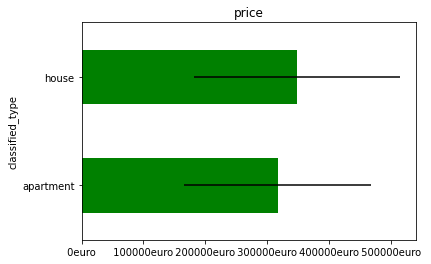

In [34]:
prices.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "price", color='green')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter(' %deuro '))
plt.savefig('proptype.png',bbox_inches='tight')

In [35]:
df_prices1 = df.groupby("classified_building_condition").agg([np.mean, np.std])

C:\Users\PC\AppData\Local\Temp\ipykernel_20296\2288473733.py:1: FutureWarning: ['classified_type', 'classified_kitchen_type', 'classified_energy_heatingType'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_prices1 = df.groupby("classified_building_condition").agg([np.mean, np.std])


In [36]:
prices1 = df_prices1['classified_price'] 
# checking for results
prices1.head()

,mean,std
classified_building_condition,,
asnew,390446.005606,165668.831539
good,337039.840889,160634.156380
justrenovated,327742.483547,143044.002097
tobedoneup,292500.795060,151615.564922
torenovate,271555.088158,136639.609251


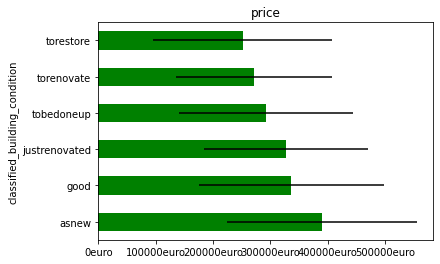

In [37]:
prices1.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "price", color='green')
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%deuro'))
plt.savefig('propcondition.png',bbox_inches='tight')

In [38]:
df_houseprices = df_house.groupby("classified_building_condition").agg([np.mean, np.std])

C:\Users\PC\AppData\Local\Temp\ipykernel_20296\3744542486.py:1: FutureWarning: ['classified_type', 'classified_kitchen_type', 'classified_energy_heatingType'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_houseprices = df_house.groupby("classified_building_condition").agg([np.mean, np.std])


In [39]:
houseprices = df_houseprices['classified_price'] 
# checking for results
houseprices.head()

,mean,std
classified_building_condition,,
asnew,436697.761644,160769.551538
good,370630.765591,168831.090616
justrenovated,325123.399696,146144.837096
tobedoneup,302402.503051,155179.885011
torenovate,272960.718373,134313.309079


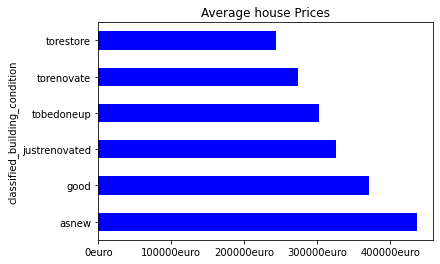

In [40]:
houseprices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average house Prices", color = ('blue'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%deuro'))
plt.savefig('housescondition.png',bbox_inches='tight')

In [41]:
df_apartmentprices = df_apartment.groupby("classified_building_condition").agg([np.mean, np.std])

C:\Users\PC\AppData\Local\Temp\ipykernel_20296\4025703129.py:1: FutureWarning: ['classified_type', 'classified_kitchen_type', 'classified_energy_heatingType'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_apartmentprices = df_apartment.groupby("classified_building_condition").agg([np.mean, np.std])


In [42]:
apartmentprices = df_apartmentprices['classified_price']
 
# checking for results
apartmentprices.head()

,mean,std
classified_building_condition,,
asnew,366511.377599,163112.587944
good,278587.475012,125429.545111
justrenovated,331695.137615,138304.816796
tobedoneup,260143.931624,134540.730695
torenovate,261832.812500,151784.723608


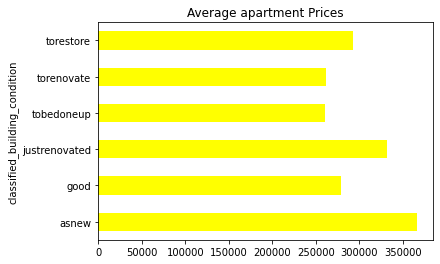

In [43]:
apartmentprices.plot(kind = "barh", y = "mean", legend = False,
            title = "Average apartment Prices", color = 'yellow')
plt.xlable = 'price (x*1e-9)'
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d'))                        
plt.savefig('apartmentcondition.png',bbox_inches='tight')

In [44]:
df2 = df.groupby(['classified_type', 'classified_building_condition'])["classified_price"].median()#agg([np.mean, np.std])

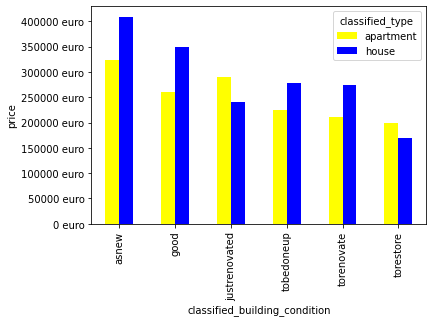

In [45]:
df2.unstack("classified_type").plot.bar(color = ('yellow', 'blue'), ylabel ='price')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d euro'))
plt.savefig('propertiescond.png',bbox_inches='tight')

In [46]:
df3 = df.groupby(['classified_type', 'classified_energy_heatingType'])["classified_price"].mean()
df3                 

classified_type  classified_energy_heatingType
apartment        electric                         265289.068410
                 fueloil                          311421.645885
                 gas                              323404.180320
house            electric                         401916.138686
                 fueloil                          338105.652225
                 gas                              348522.678461
Name: classified_price, dtype: float64

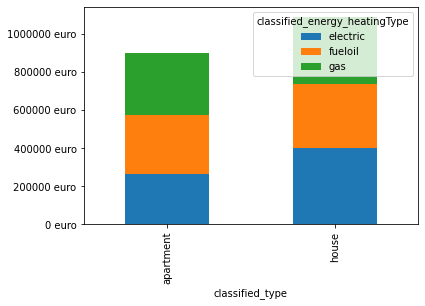

In [51]:
df.groupby(['classified_type', 'classified_energy_heatingType'])["classified_price"].mean().unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d euro'))
plt.savefig('propheatingtype.png',bbox_inches='tight')

In [48]:
#%%bash
#jupyter nbconvert 'C:/Users\PC\Desktop\becode_projects\Immoeliza\data_analysis\data_analysis.ipynb' --to slides --ServePostProcessor.port=8910 --post serve

<AxesSubplot:xlabel='classified_energy_heatingType', ylabel='price'>

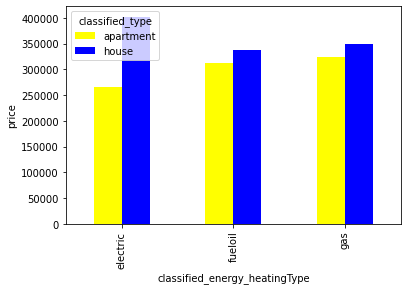

In [53]:
df2 = df.groupby(['classified_type', 'classified_energy_heatingType'])["classified_price"].mean()
df2.unstack("classified_type").plot.bar(color = ('yellow', 'blue'), ylabel ='price')